##### 發送 LINE Notify 通知
這篇文章會使用 Python 的 Requests 函式庫，結合 LINE Notify 的 API，實作執行 Python 的程式後，發送通知訊息到個人的 LINE，\
甚至還可以透過 LINE Notify 發送圖片或貼圖表情。

##### 什麼是 LINE Notify 
LINE Notify 是 LINE 所提供的一項非常方便的服務，用戶可以透過 LINE，接收各種網站、服務或應用程式 ( GitHub、IFTTT 及 Python...等 ) 的提醒通知，\
與網站服務連動完成後，LINE所 提供的官方帳號「LINE Notify」將會傳送通知，不僅可與多個服務連動，也可透過 LINE 群組接收通知。

* LINE Notify 網址：https://notify-bot.line.me/zh_TW/

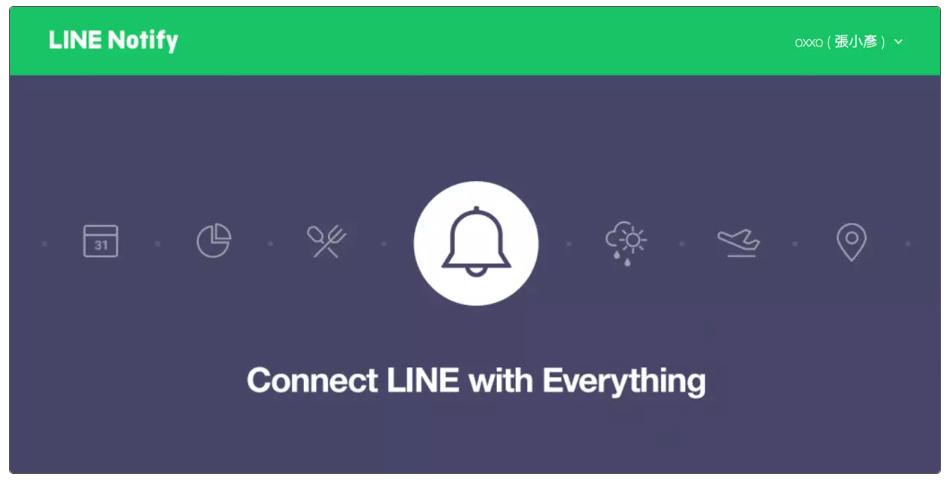

##### 申請 LINE Notify 權杖 
打開 LINE Notify 的網站 ( https://notify-bot.line.me/zh_TW/ ) 後，使用自己的 LINE 帳號登入，登入後從上方個人帳號，選擇「個人頁面」。

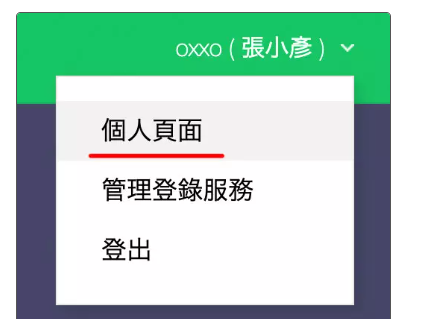

進入個人頁面後，點選下方「發行權杖」，權杖 ( token ) 的作用在於讓「連動的服務」可以透過 LINE Notify 發送訊息通知。

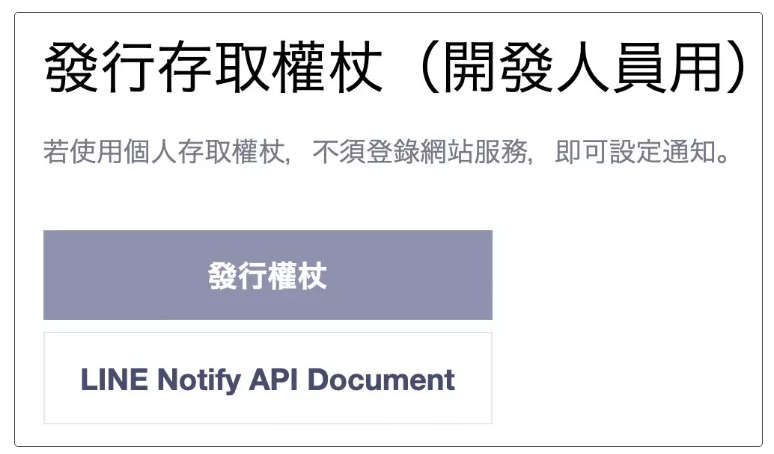

點選「發行權杖」後，必須要定義權杖的名稱，以及選擇這個 LINE Notify 所在的聊天群組，通常直接選擇「透過 1 對 1 聊天接收 LINE Notify 通知」。

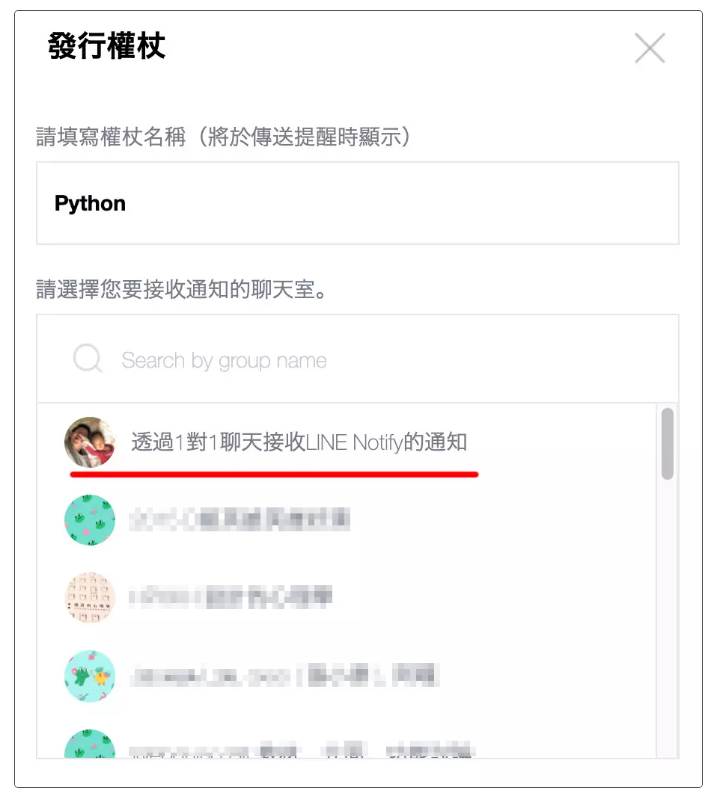

發行權杖後，會出現一串權杖代碼，點擊下方綠色的「複製」就可複製權杖代碼。

* 注意，權杖代碼只會出現一次，複製後自行找地方留存。

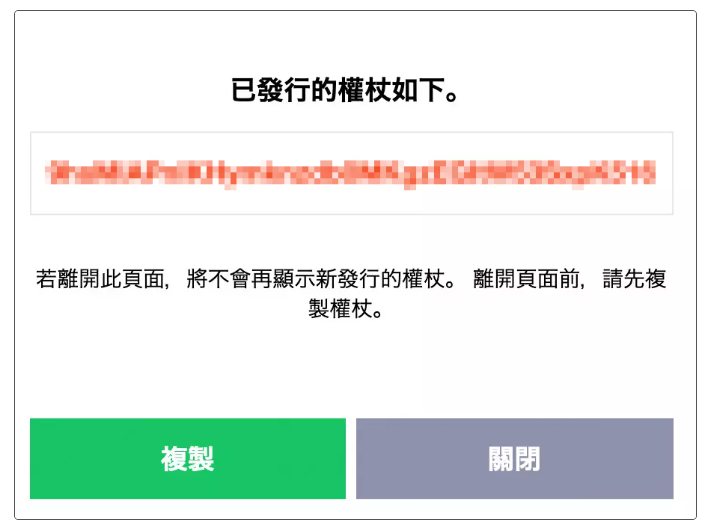

rZRzXh0RclXHNlw12YEDFyiM1r4ReRz9KbZUnyhBW5d

點擊關閉，在個人頁面裡就會看見已經發行的權杖，點選後方「刪除」就能解除權杖 ( 如果不小心權杖流出導致一直收到奇怪的通知，就可以將權杖解除，重新再發行一次 )。

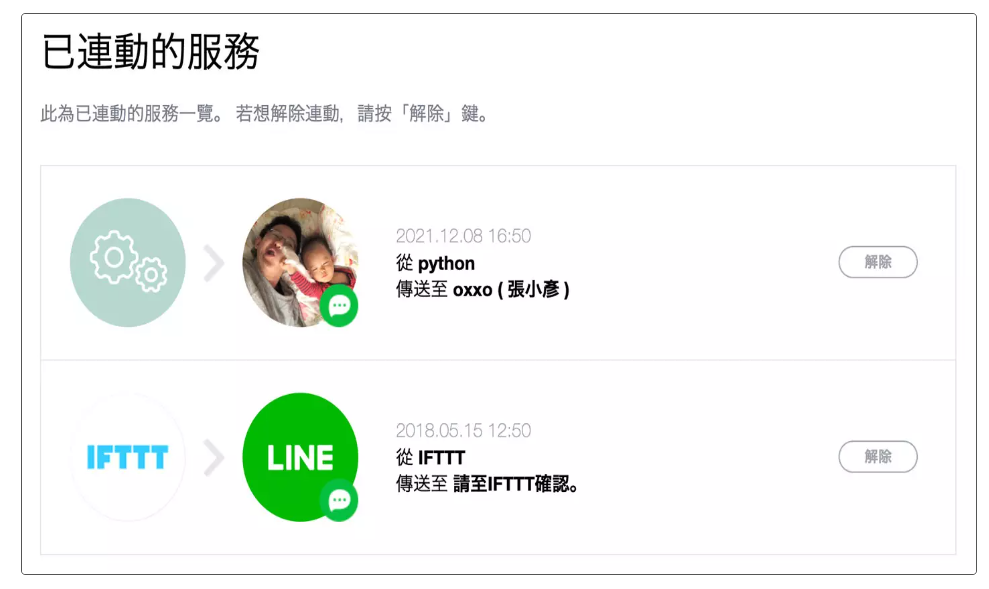

當權杖發行後，在個人的 LINE 裡，就會收到「已發行個人權杖」的通知訊息 ( 解除權杖也會收到通知 )。

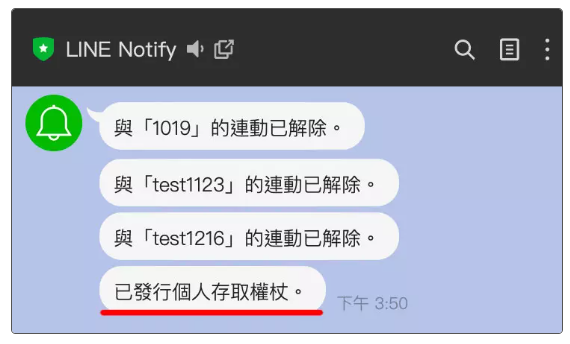

##### 發送 LINE Notify 訊息 
有了 LINE Notify 的權杖後，就能使用 Requests 的 POST 方法發送訊息，發送時需要在 headers 設權杖 Authorization，\
並將訊息內容放在 data 的 message 裡，完成後執行 Python 程式，LINE 就會收到通知。

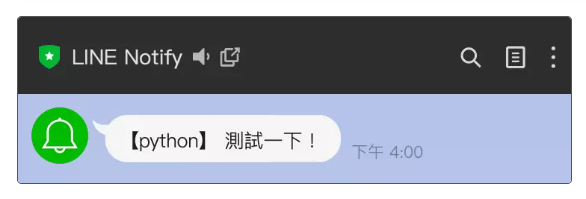

In [ ]:
import requests

url = 'https://notify-api.line.me/api/notify'
token = '剛剛複製的權杖'
headers = {
    'Authorization': 'Bearer ' + token    # 設定權杖
}
data = {
    'message':'測試一下！'     # 設定要發送的訊息
}
data = requests.post(url, headers=headers, data=data)   # 使用 POST 方法

##### 透過 LINE Notify 發送表情貼圖 
在發送的 data 裡，加入 stickerPackageId ( 貼圖包類別號碼 ) 和 stickerId ( 貼圖號碼 )，就能夠發送表情貼圖。

* 表情貼圖清單：https://developers.line.biz/en/docs/messaging-api/sticker-list/

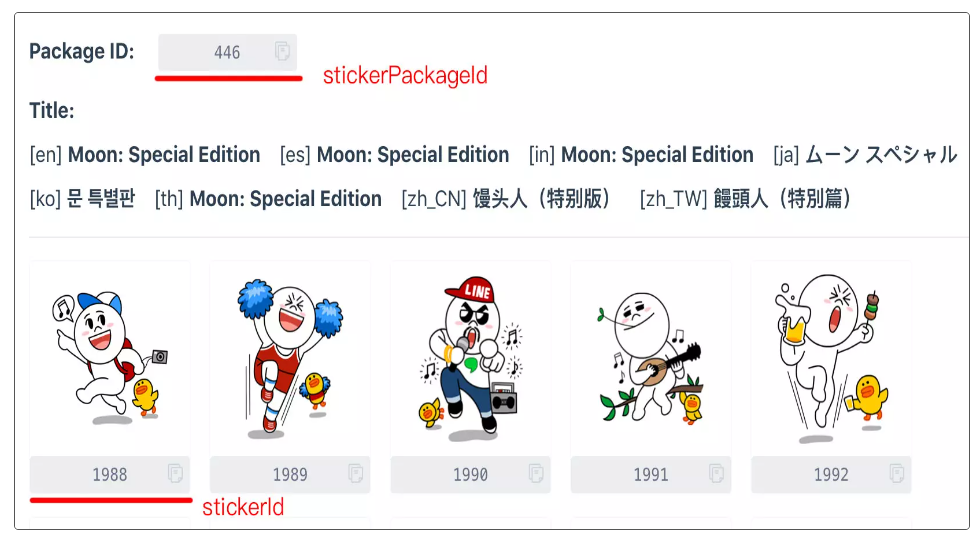

下方的程式執行後，就會發送表情貼圖。

* 注意，LINE Notify 必須具備 message，所以不能移除 message ( 至少要是一個空字元 )。

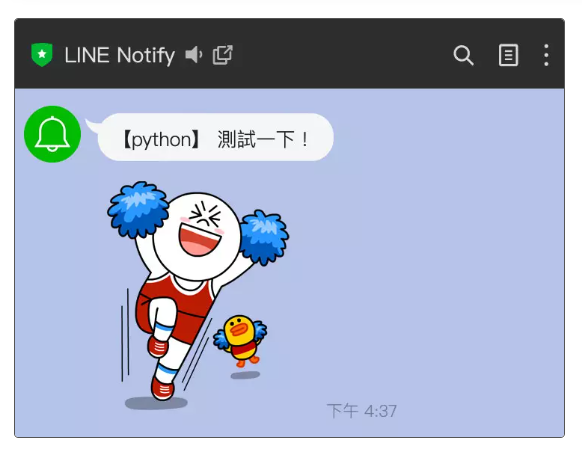

In [ ]:
import requests

url = 'https://notify-api.line.me/api/notify'
token = '剛剛複製的權杖'
headers = {
    'Authorization': 'Bearer ' + token
}
data = {
    'message':'測試一下！',
    'stickerPackageId':'446',
    'stickerId':'1989'
}
data = requests.post(url, headers=headers, data=data)

##### 透過 LINE Notify 傳送圖片 
在發送的 data 裡，加入 imageThumbnail ( 縮圖網址 ) 和 imageFullsize ( 圖片網址 )，就能夠傳送圖片。

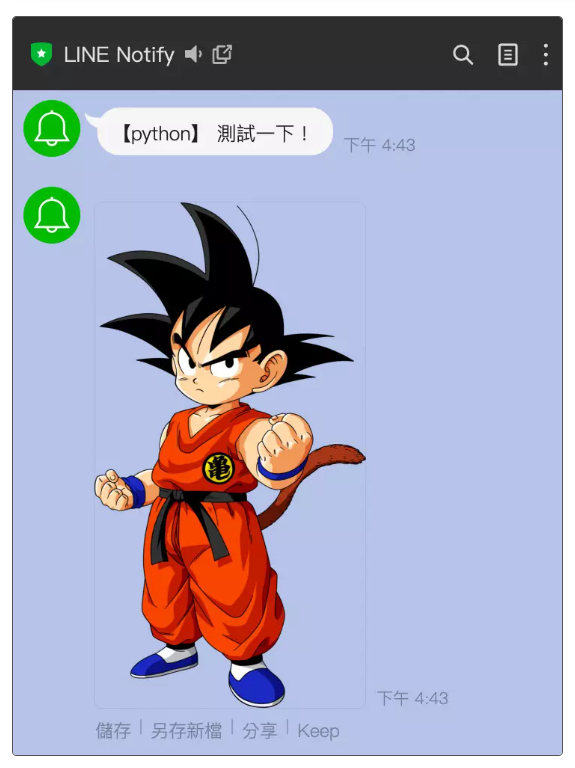

In [ ]:
import requests

url = 'https://notify-api.line.me/api/notify'
token = '剛剛複製的權杖'
headers = {
    'Authorization': 'Bearer ' + token
}
data = {
    'message':'測試一下！',
    'imageThumbnail':'https://steam.oxxostudio.tw/downlaod/python/line-notify-demo.png',
    'imageFullsize':'https://steam.oxxostudio.tw/downlaod/python/line-notify-demo.png'
}
data = requests.post(url, headers=headers, data=data)

##### 小結 
能夠使用 LINE Notify 傳送訊息後，就能將爬蟲爬取的資料經過 Python 處理後 ( 也可以不處理 )，再透過 LINE Notify 傳送到自己的 LINE，對於爬蟲的應用就更加廣泛。